In [8]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#뭔가 오류있음

# Excel 데이터를 데이터프레임 변환 
df = pd.read_csv('data/part4/시도별 전출입 인구수.csv', header = 0, encoding='utf-8').fillna(0)

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

In [ ]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_csv('data/part4/시도별 전출입 인구수.csv', header = 0, encoding='utf-8').fillna(0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

C:\Users\heemang0221\AppData\Local\Temp\ipykernel_16976\3545384480.py:15: FutureWarning: convert_float is deprecated and will be removed in a future version
  df = pd.read_excel('data/part4/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)


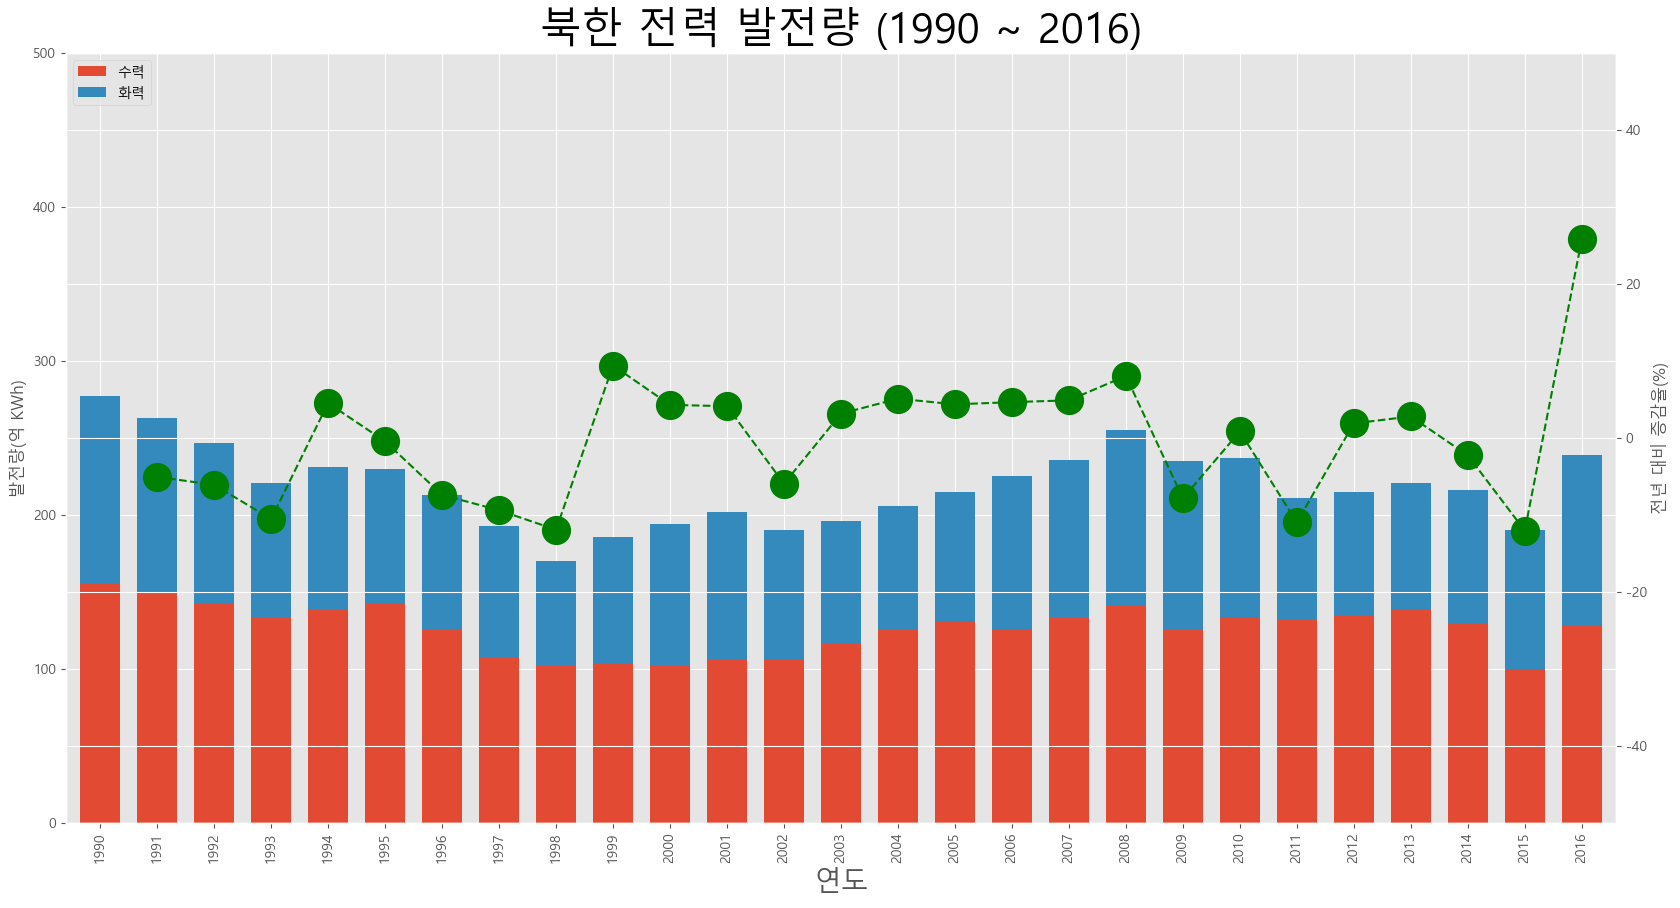

In [6]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "data/part4/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/part4/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

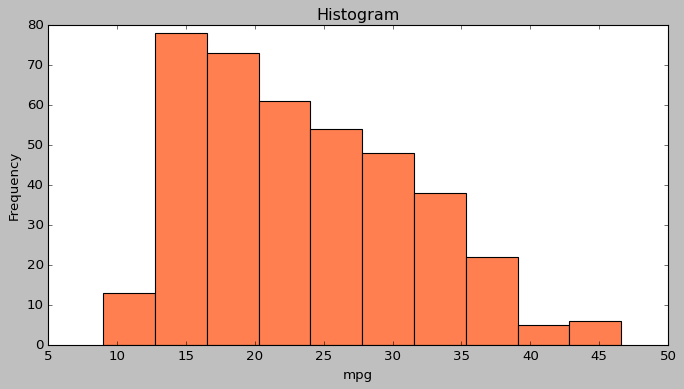

In [7]:
plt.style.use('classic')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('data/part4/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

c:\Users\heemang0221\Anaconda3\envs\main\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


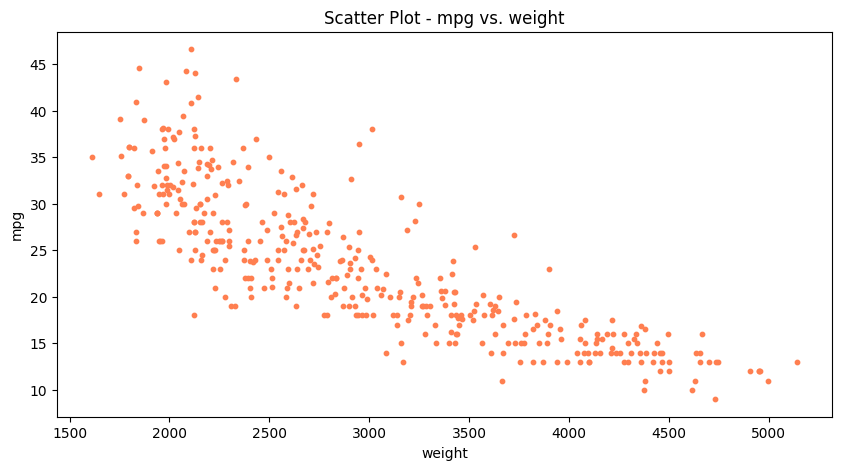

In [13]:
plt.style.use('default')   # 스타일 서식 지정

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

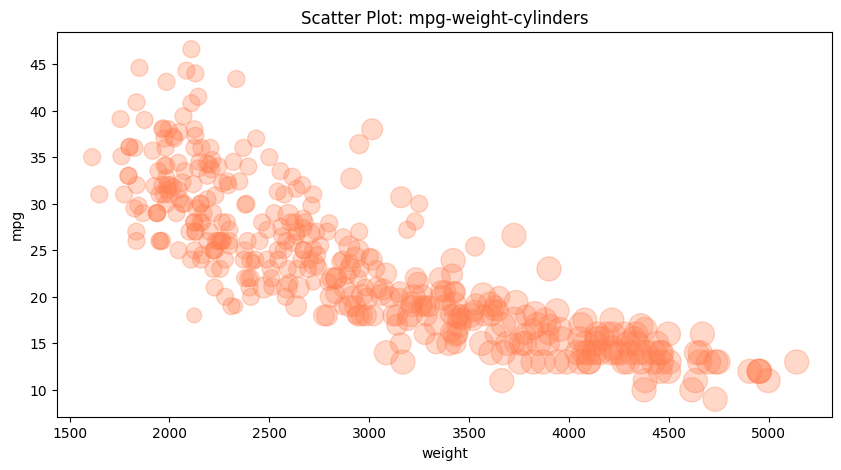

In [14]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

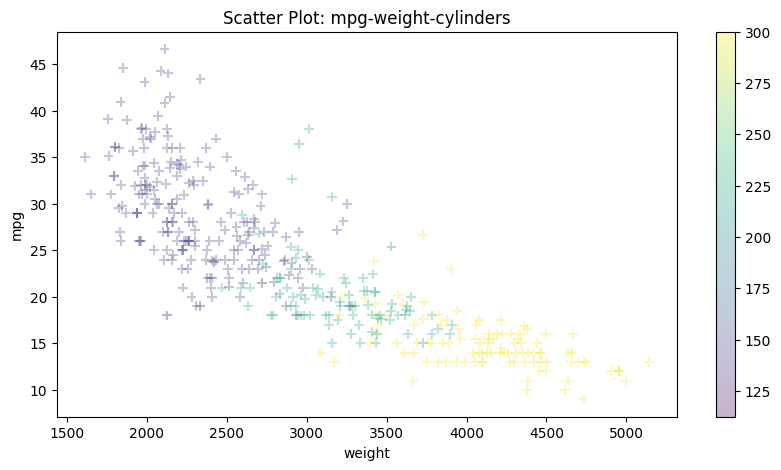

In [15]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


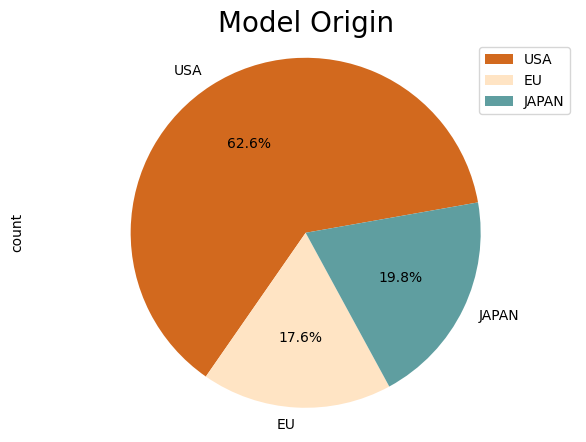

In [16]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

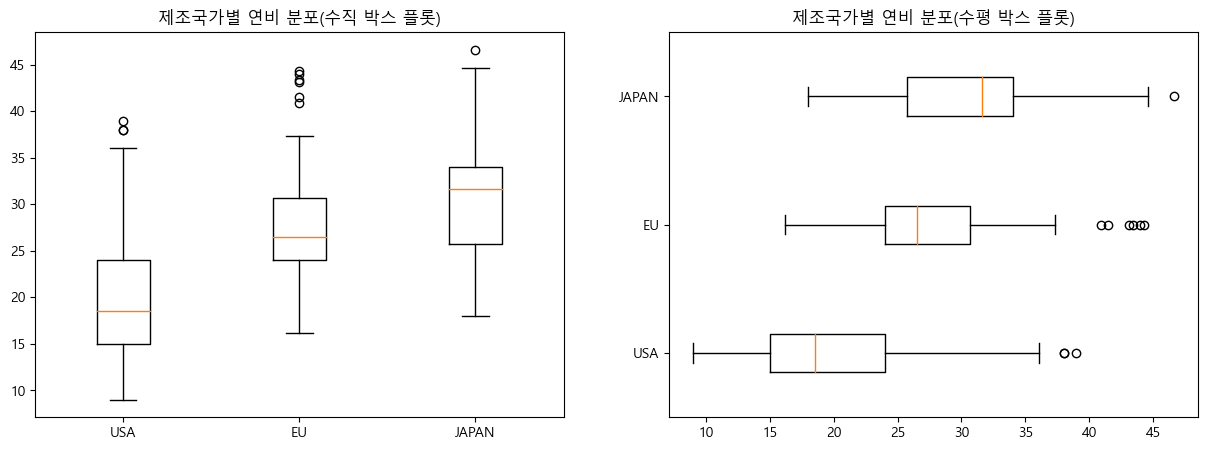

In [18]:
from matplotlib import font_manager, rc
font_path = "data/part4//malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

In [21]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

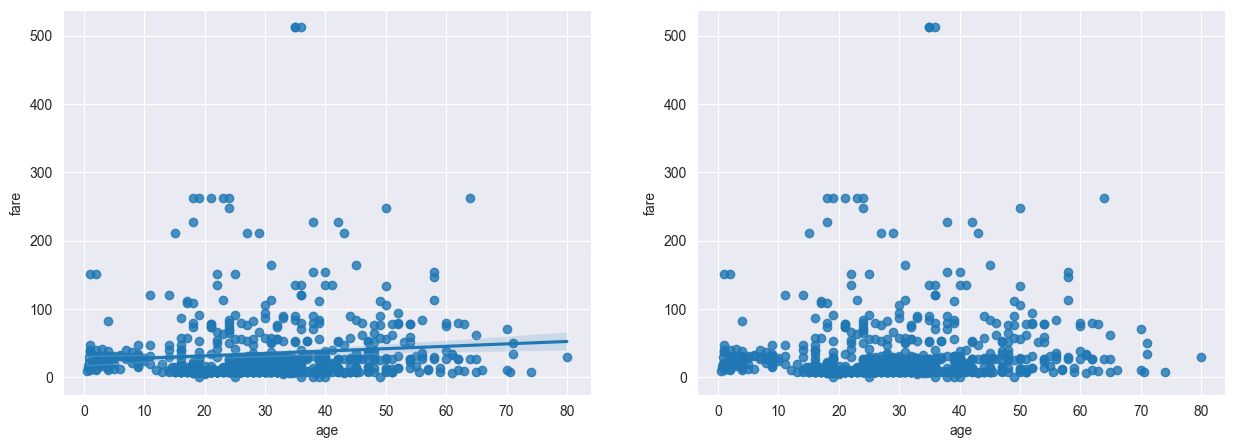

In [22]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1)         #axe 객체 - 1번째 그래프 

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프        
            fit_reg=False)  #회귀선 미표시

plt.show()

C:\Users\heemang0221\AppData\Local\Temp\ipykernel_16976\3117035202.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)


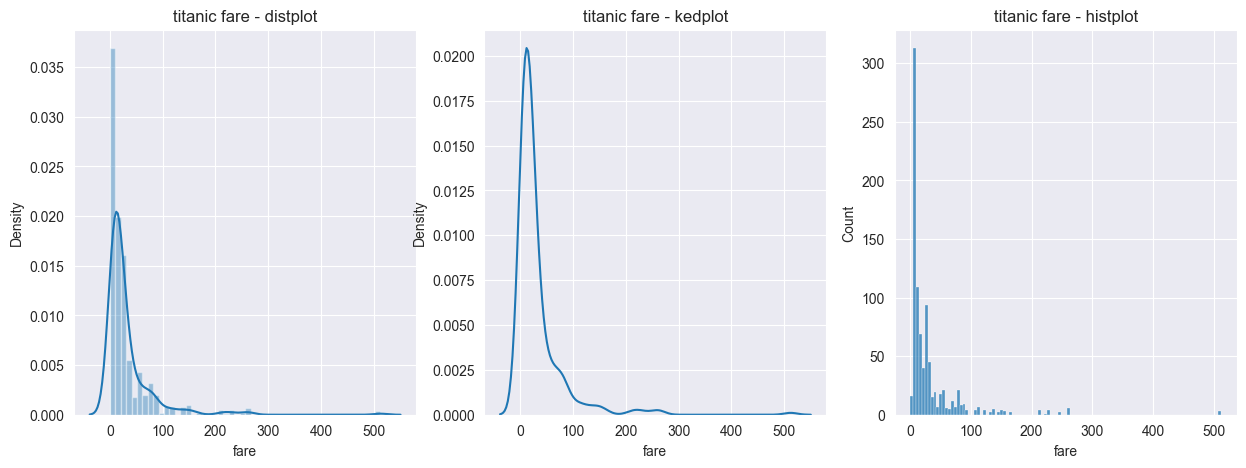

In [23]:
# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# distplot
sns.distplot(titanic['fare'], ax=ax1) 

# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2) 

# histplot
sns.histplot(x='fare', data=titanic,  ax=ax3)        

# 차트 제목 표시
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kedplot')
ax3.set_title('titanic fare - histplot')

plt.show()

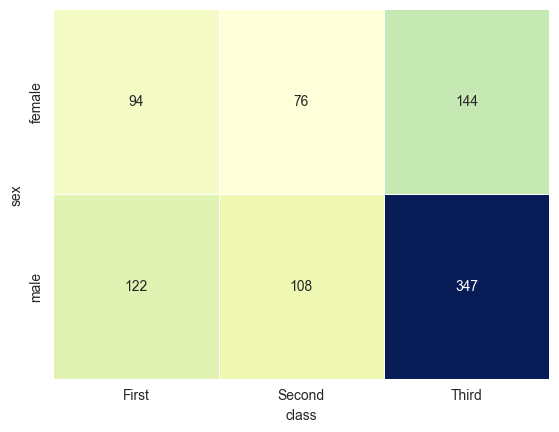

In [24]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부

plt.show()

c:\Users\heemang0221\Anaconda3\envs\main\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


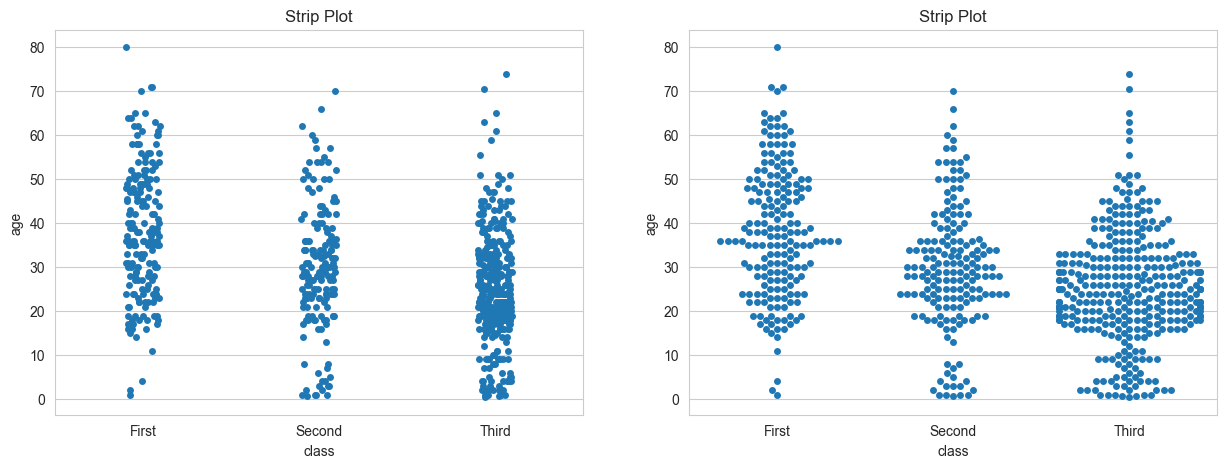

In [25]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class",      #x축 변수
              y="age",        #y축 변수           
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax1)         #axe 객체 - 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="class",      #x축 변수
              y="age",        #y축 변수
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax2)         #axe 객체 - 2번째 그래프        

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

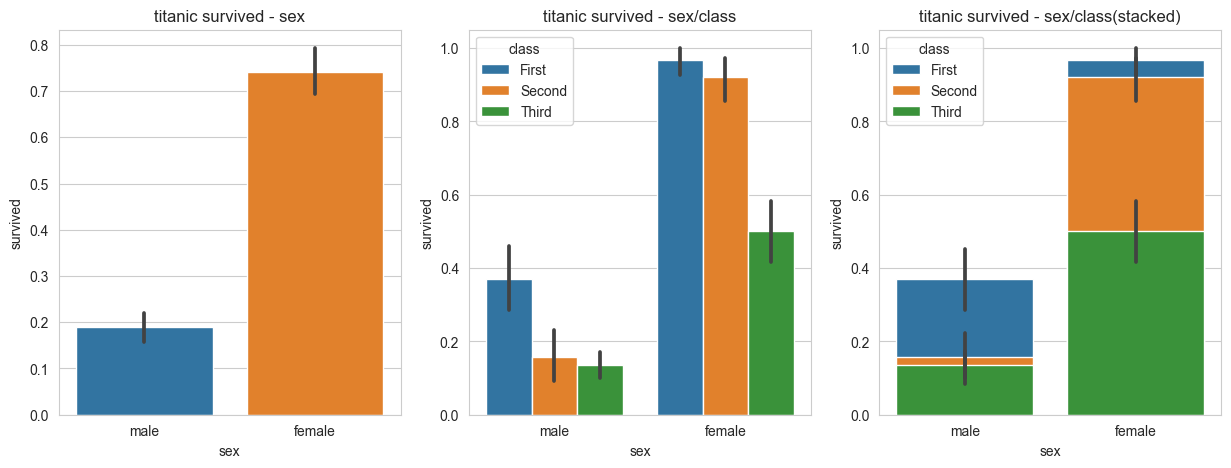

In [26]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

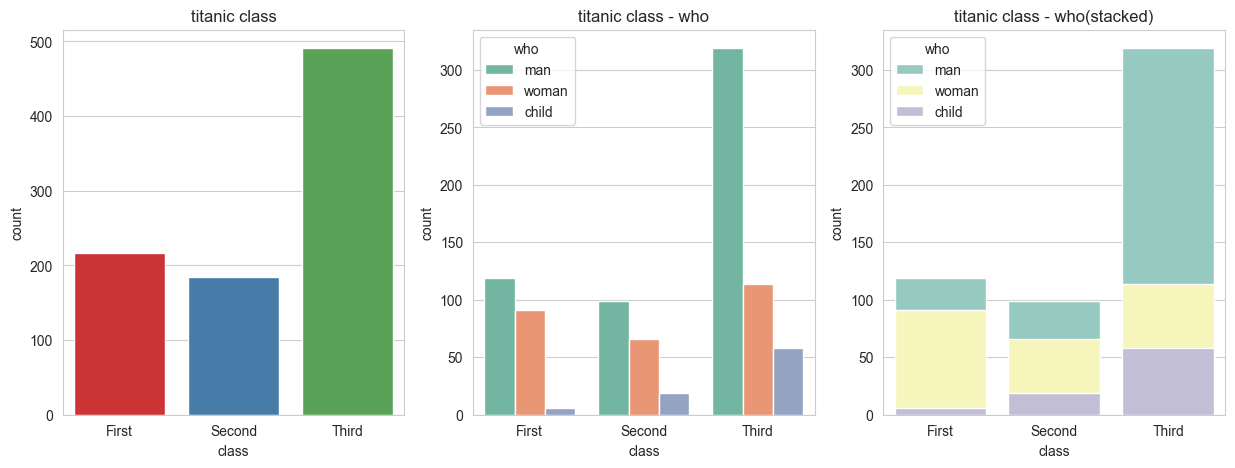

In [29]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2) 

# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

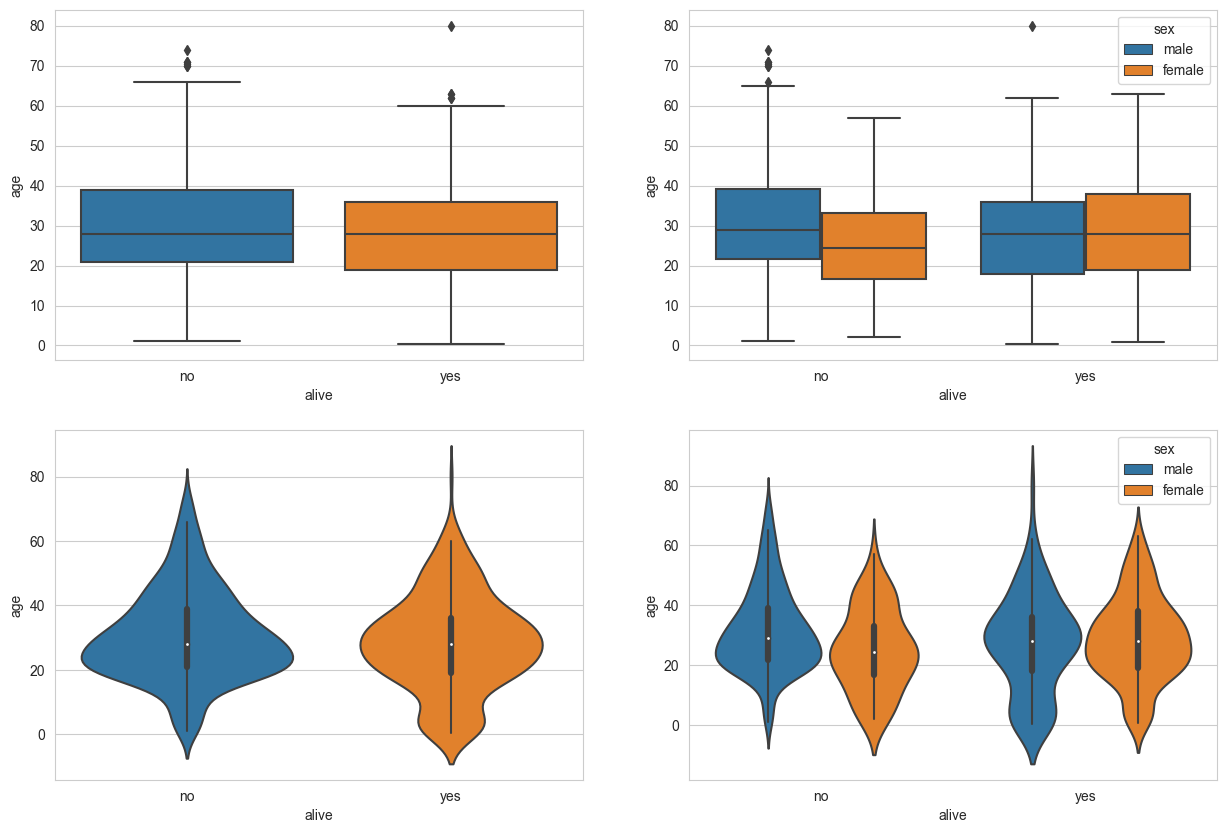

In [30]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1) 

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2) 

# 박스 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3) 

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4) 

plt.show()

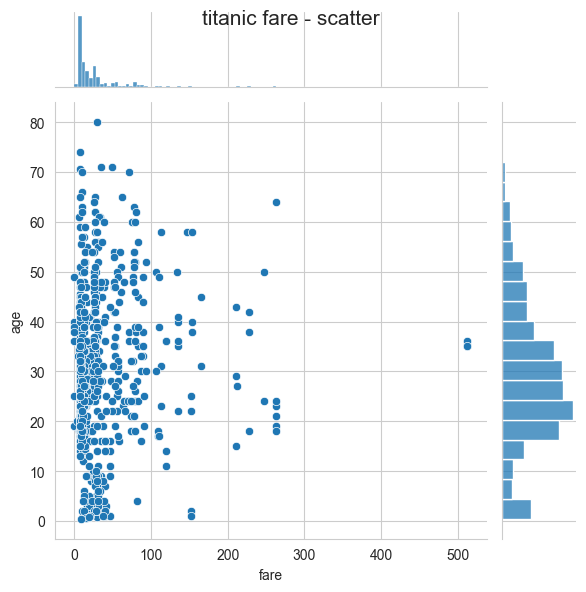

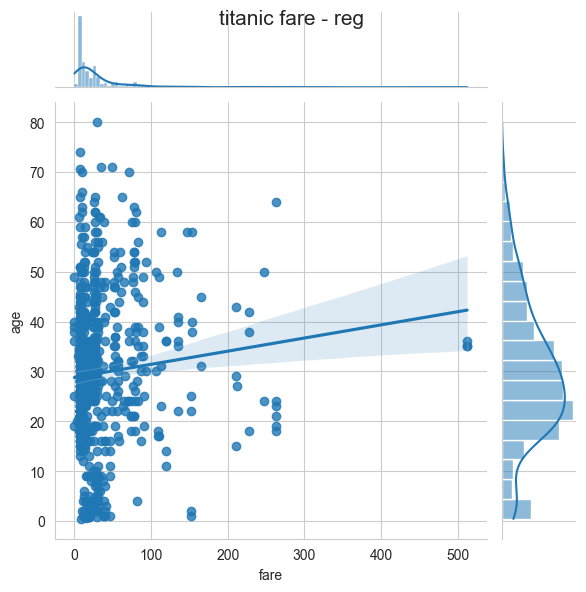

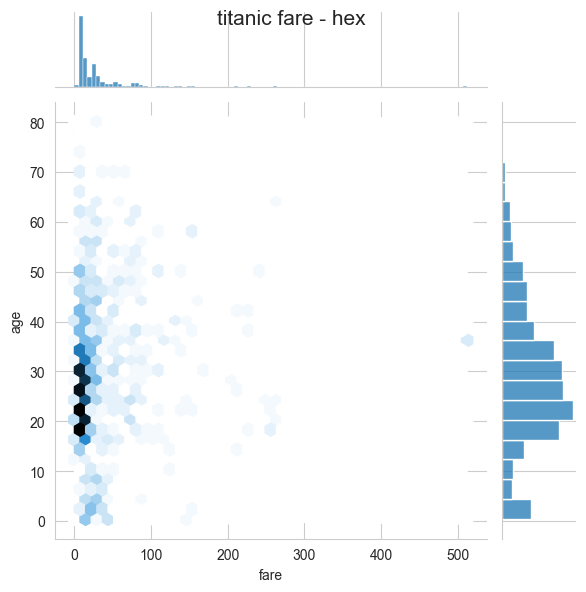

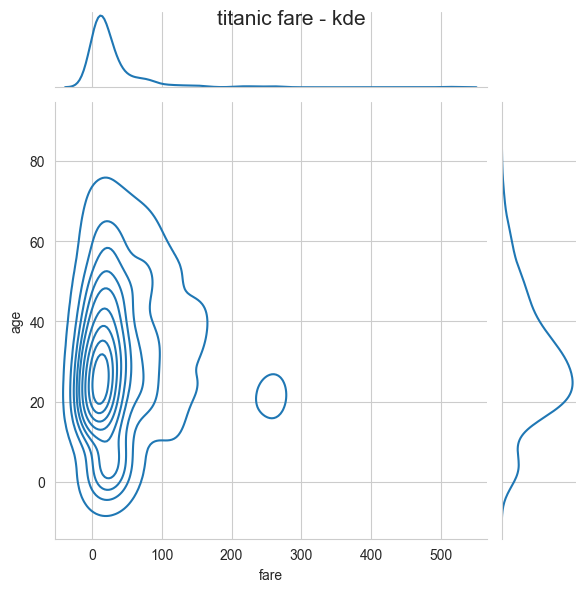

In [31]:
# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic) 

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) 

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) 

# 조인트 그래프 - 커럴 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) 

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

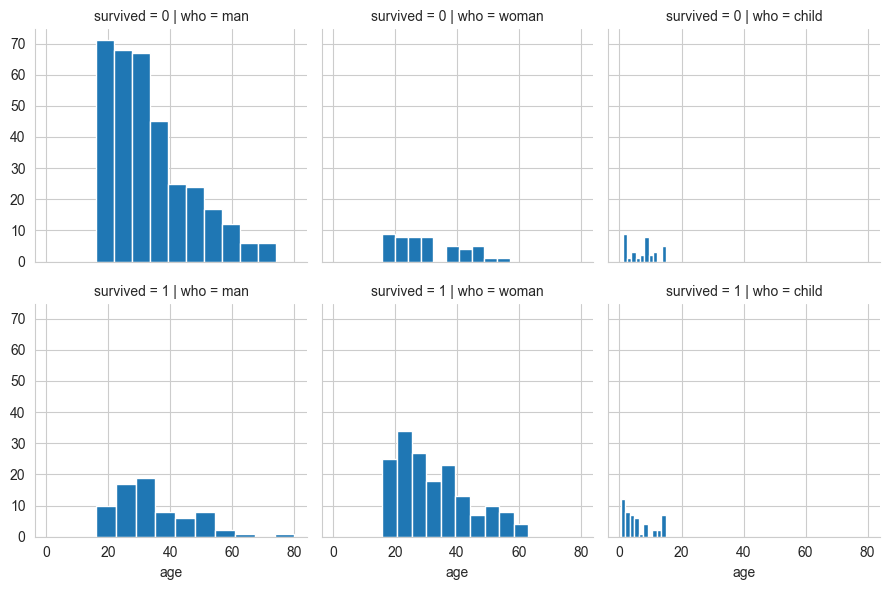

In [32]:
# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived') 

# 그래프 적용하기
g = g.map(plt.hist, 'age')

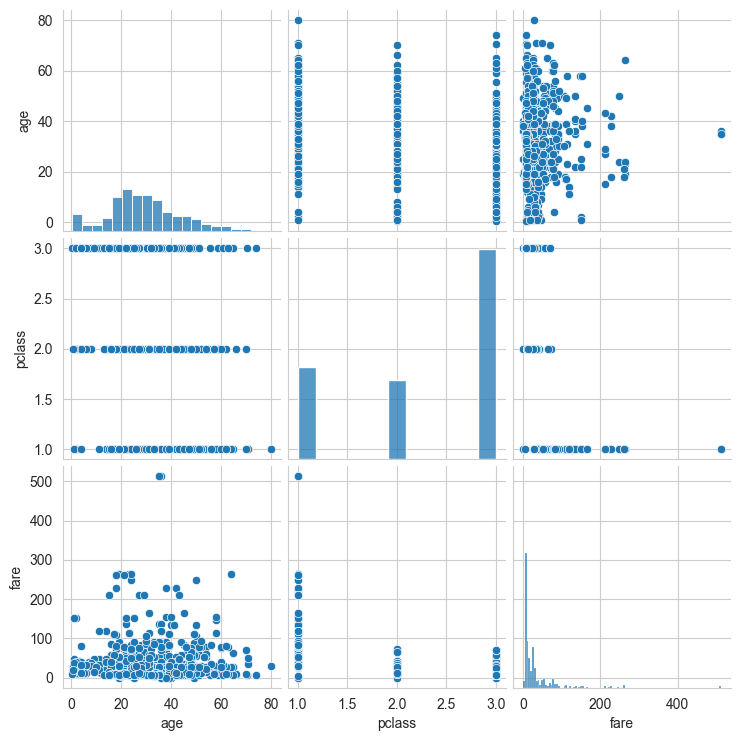

In [33]:
# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

In [35]:
# 라이브러리 불러오기
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')

In [36]:
# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', 
                        zoom_start=15)

# 지도를 HTML 파일로 저장하기
seoul_map2.save('data/part4/seoul2.html')
seoul_map3.save('data/part4/seoul3.html')

In [38]:
# 대학교 리스트를 데이터프레임 변환
df = pd.read_excel('data/part4/서울지역 대학교 위치.xlsx', engine= 'openpyxl')

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('data/part4/seoul_colleges.html')

In [39]:
# 대학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,         # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name
    ).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges2.html')

In [40]:
import json

In [41]:
# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = 'data/part4/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine= 'openpyxl')  
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = 'data/part4/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'  

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],               
                 key_on='feature.properties.name',
                 ).add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('./gyonggi_population_' + year + '.html')